Project 2
=======================================
Assignment: Choose any three of the “wide” datasets identified in the Week 5 Discussion items
Create a CSV file with the information from the datasets.
These CSVs have been saved to the Github repository for this project.

In [302]:
#import statements
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
from matplotlib.pyplot import pie
import matplotlib
%matplotlib inline

#Read the information from your .CSV file into Python, and use pandas as needed to tidy and transform your data.
#Reading the data into dataframes
vax = pd.read_csv('country_vaccinations.csv') #Covid Vaccines by Wilson
netflix = pd.read_csv('netflix_titles.csv') #Netflix by Sarah Morris
workouts = pd.read_csv('workouts.csv') #Peloton posted by Sarah May

Dataset: Peloton Works posted by Sarah May
-----------------------------------------------
Looking at the data, all of the rows have some null values and there are three columns that contain only null values.
**Tidying the data will involve:**
- Remove null columns Avg. Heartrate, Avg. Incline, Avg. Pace(min/max)
- Then remove all rows with null values

In [303]:
#remove unneeded columns
workouts.drop(columns=['Avg. Heartrate','Avg. Incline','Avg. Pace (min/mi)'], inplace=True)
#drop rows with empty values
workouts.dropna(inplace=True, axis='rows')

Determine what the unique titles are:

In [304]:
workouts['Title'].unique()

array(['45 min Top Hits Ride', '20 min Hip Hop Ride',
       '30 min Hip Hop Ride', '30 min Club Bangers Ride',
       '20 min Low Impact Ride', '20 min 90s Ride', '15 min 90s Ride',
       '15 min Hip Hop Ride', '15 min 2000s Hip Hop Ride',
       '30 min 90s Hip Hop Ride', '20 min 90s Pop Ride',
       '20 min 2000s Hip Hop Ride', '10 min Climb Ride',
       '15 min Boss Ride', '30 min Low Impact Ride', '15 min EDM Ride',
       '10 min Low Impact Ride', '15 min HIIT Ride', '30 min EDM Ride',
       '15 min Low Impact Ride', '45 min Power Zone Ride',
       '30 min Power Zone Ride', '20 min House Ride',
       '30 min Power Zone Endurance Ride',
       '45 min Power Zone Endurance Ride', '30 min Power Zone EDM Ride',
       '20 min Beginner Ride', '20 min 90s Dance Ride',
       '30 min HIIT & Hills Ride', '30 min 2010s Ride', '45 min EDM Ride',
       '20 min EDM Ride', '45 min 2010s Ride', '45 min HIIT & Hills Ride',
       '60 min Power Zone Endurance Ride', '30 min Power Zone Max

- The column Avg. Resistance has a percent sign, causing issues with numerical calculations, remove the %
- Now we can convert the Avg Resistance column from an object to an int
- The Title column includes the length of the workout but this is redundant as it is included in the length column, we remove the time from the title

In [305]:
workouts['Avg. Resistance'] = workouts['Avg. Resistance'].map(lambda x: x.rstrip('%'))
workouts['Avg. Resistance'] = pd.to_numeric(workouts['Avg. Resistance'])
workouts['Title'].replace({'^...min.':"", '^[0-9].min.':""}, regex=True, inplace=True)

The dataset has been tidied and transformed.
There was no analysis suggestion in the discussion post.
**Results** The analysis will look at the average, min and max calories burned over the types of unique workouts.

In [306]:
workouts.groupby('Title').CaloriesBurned.agg(['count', 'mean', 'max', 'min'])

,count,mean,max,min
Title,,,,
2000s Hip Hop Ride,2,122.000000,142.0,102.0
2000s Ride,1,286.000000,286.0,286.0
2010s Ride,3,179.666667,272.0,87.0
90s Dance Ride,1,119.000000,119.0,119.0
90s Hip Hop Ride,1,220.000000,220.0,220.0
90s Pop Ride,2,143.500000,150.0,137.0
90s Ride,2,110.500000,122.0,99.0
BHM: Fresh Friday Ride,1,189.000000,189.0,189.0
Beginner Ride,1,124.000000,124.0,124.0


Dataset: Netflix Data posted by Sarah Morris
-----------------------------------------------
This data is a wide dataset, there are multiple columns that are not needed for analysis.
- Remove the description field, cast and director reducing the overall size of the dataset
- Remove entries that do not have countries listed

In [307]:
netflix.drop(columns=['description','cast','director'], inplace=True )
netflix.dropna(subset=['country'], how='any', inplace=True)
netflix.dropna(subset=['rating'], how='any', inplace=True)

For this dataset we want to know what rating type has the most counts and in what years
We are going to analyze this only for the United States, within the last 10 years
- Return only results that have United States in the Country
- Determine the number of ratings for each year
- Find only the years greater than or equal to 2010

In [308]:
netflixUS = netflix[netflix['country'].str.contains("United States")]
grouped = netflixUS.groupby(['release_year', 'rating']).size().reset_index(name='count')
groups = grouped[grouped.release_year >= 2010]
groups.sort_values(by=['count'],ascending=False).head()

,release_year,rating,count
315,2019,TV-MA,218
306,2018,TV-MA,198
294,2017,TV-MA,196
325,2020,TV-MA,152
284,2016,TV-MA,114


**Result:** We can see that the top 5 results are all TV-MA
TV-MA:  "This program is intended to be viewed by mature, adult audiences and may be unsuitable for children under 17"
We can conclude that the most popular releases by Netflix are TV-MA as they look to appeal to an adult audience which should represent most of their user base.

Dataset: Vaccination Progress Data posted by Wilson NG
-----------------------------------------------
- This dataset contains many more columns than we need for analysis
- This dataset is a wide dataset that has multiple columns that may have null values, drop rows if null for country
- Fill any empty values with 0, we can assume no data that there were no people vaccinated or it was not calculated

<AxesSubplot:ylabel='total_vaccinations'>

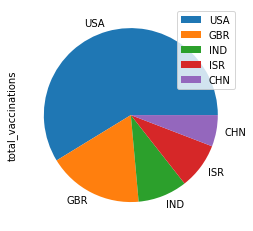

In [309]:
vax.drop(columns=['source_website','source_name','country'], inplace=True)
vax.dropna(subset=['iso_code'], inplace=True)
vax.replace(np.nan, 0)
vaxtotal = vax.total_vaccinations.groupby(vax.iso_code).sum()
sortvax = vaxtotal.sort_values( ascending=False).head()
sortvax = pd.DataFrame(sortvax)

sortvax.plot(kind='pie',y='total_vaccinations')

**Results** We have a pie chart of the top 5 countries that have done the highest total number of vaccinations over all time reported